<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_02_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 02 - Self-Organizing Map (SOM)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 2 – APRENDIZADO NÃO SUPERVISIONADO

1. Selecionar pelo menos dois datasets:

2. Aplicar um modelo neural não supervisionado

3. Avaliar os padrões detectados em cada conjunto:

4. Clusters / outliers, etc.

5. Avaliar a homogeneidade dos agrupamentos

6. Variar os parâmetros do modelo (grid, taxas ($\sigma$), número
de neurônios, etc.)



# Introdução 

Para a realização deste caderno irei utilizar como referência o [trabalho](https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto2-som) de Felipe Menino Carlos disponível no Kaggle como referência. 

Ele utilizou o `minisom`, uma biblioteca do python que possuim a implementação algorítimo SOM no seu backend disponível no [Github](https://github.com/JustGlowing/minisom).

Os dados que irei utlizar foram acessados no UCI Machine Learning Data Set e refere-se aos dados de [Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)


$$ h_{j,i(x)} =  \exp  \left(-\frac{d^2_{j,i}}{2\sigma^2}  \right) $$

$$
\sigma(n) = \sigma_0 \exp \left(-\frac{n}{\tau} \right)
$$



# Warm Up

## Iris dataset

I will start this project working with a very comum dataset in order to understand the main goal of SOM algorithm and the `minisom` library.

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=ba00d8d196103da42d18352e0e59d728489794c973b4f1824773dbd70d66ec1a
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [116]:
import numpy as np
import pandas as pd
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
#import matplotlib.gridspec as gridspec
#from plotnine import *

In [3]:
#Fixing the random seed 
np.random.seed(666)

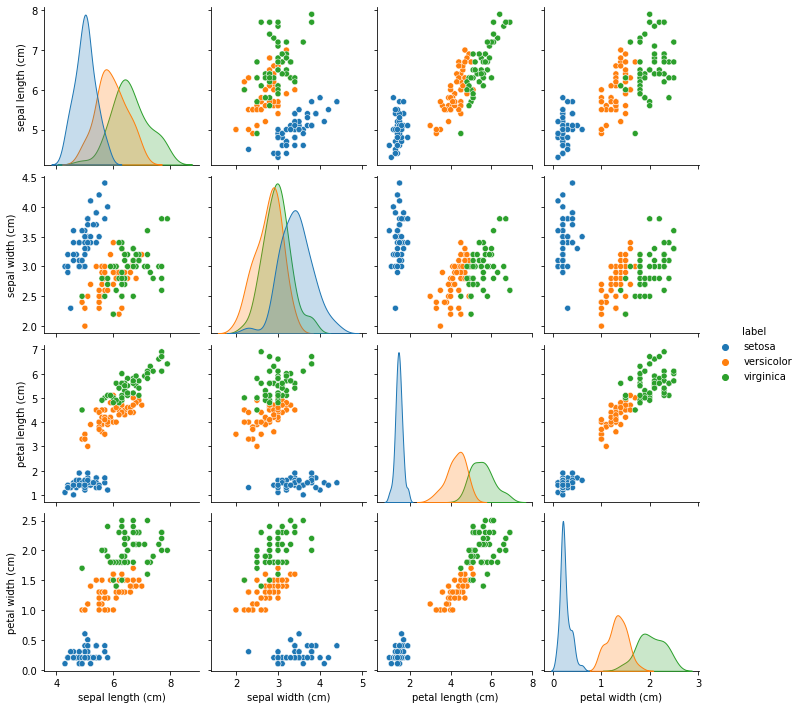

In [42]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = [iris.target_names[i] for i in iris.target]
sns.pairplot(df, hue = 'label')

In [43]:
features = df.drop(['label'], axis=1)

Text(0.5, 1.0, 'Correation Map')

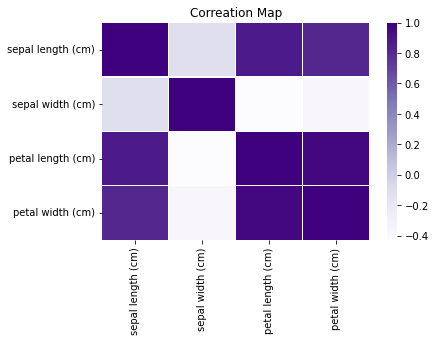

In [44]:
sns.heatmap(features.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Purples")
plt.title('Correation Map')

## Training Mini SOM

In [45]:
# som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,neighborhood_function='gaussian', random_seed=10)
som_iris33 = MiniSom(3, 3, 4, random_seed = 00)
som_iris33.random_weights_init(iris.data)
som_iris33.train_random(iris.data, 1000)

In [46]:
#Quantização e error topográfico
for method in ['quantization_error', 'topographic_error']:
        print(f'{method}: {getattr(som_iris33, method)(iris.data)}')

quantization_error: 0.4650901506593532
topographic_error: 0.13333333333333333


## Ploting Heatmap

<Figure size 432x288 with 0 Axes>

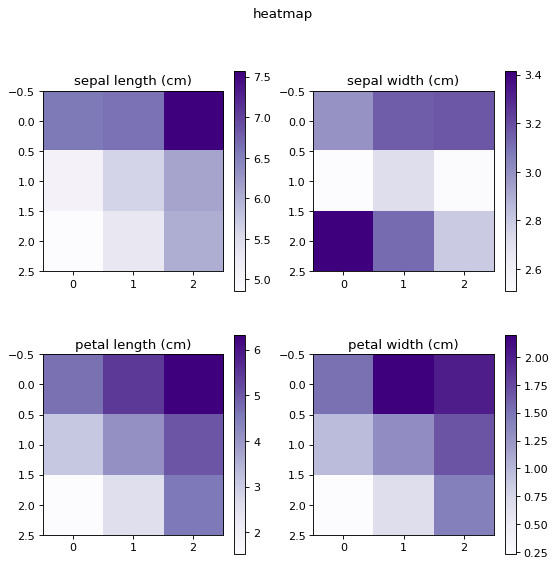

In [47]:
grid_shape = som_iris33.get_weights().shape[0:2]
weights = som_iris33.get_weights()
plt.figure()
#heatmap(som_iris33, iris.feature_names, (2, 2), cmap='Reds')
figure(figsize=(8, 8),dpi=80)
for i in range(len(iris.feature_names)):
  plt.subplot(2,2, i + 1)
  plt.title(iris.feature_names[i])
  plt.imshow(weights[:, :, i], cmap='Purples')
  plt.suptitle('heatmap')
  plt.colorbar() #for plot the bar
plt.show()

Text(0.5, 1.0, 'U-Matrix')

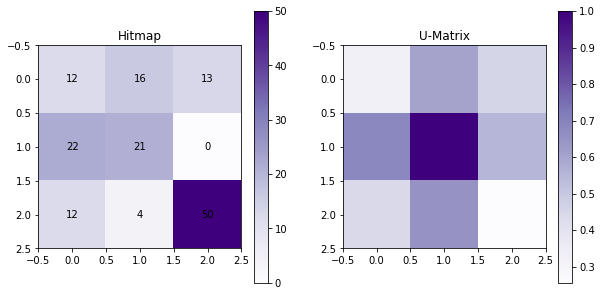

In [48]:
figure(figsize=(10,5))
plt.subplot(1,2,1)
frequencies = som_iris33.activation_response(iris.data).astype(int)
#transpose
frequencies = frequencies.T[::-1]
plt.imshow(frequencies,cmap='Purples')
plt.colorbar()
for (i, j), value in np.ndenumerate(frequencies):
        plt.text(j, i, value, verticalalignment='center', 
                              horizontalalignment='center')
plt.title('Hitmap')        
plt.subplot(1,2,2)
plt.imshow(som_iris33.distance_map(),cmap="Purples")
plt.colorbar()
plt.title('U-Matrix')

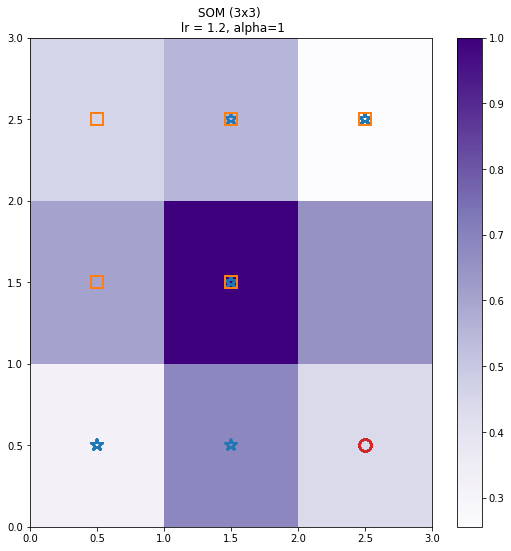

In [49]:
som = som_iris33
data = iris.data
target = iris.target
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='Purples')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['*', 's', 'D','o']
colors = ['C0', 'C1', 'C2','C3']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
plt.title('SOM (3x3) \n lr = 1.2, alpha=1')
plt.show()

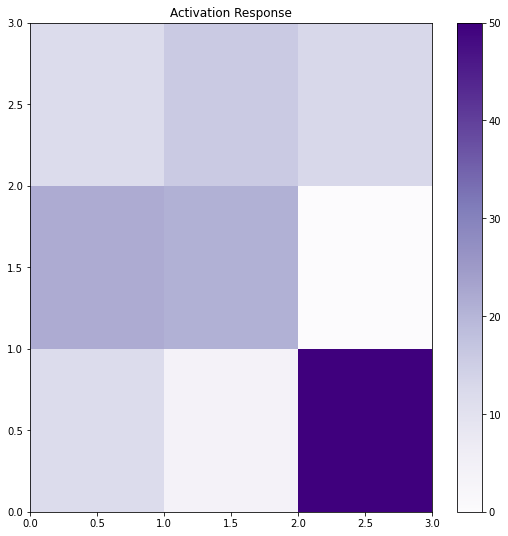

In [50]:
plt.figure(figsize=(9, 9))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Purples') 
plt.colorbar()
plt.title('Activation Response')
plt.show()

In [51]:
label_names = np.array(df.label.unique())

In [52]:
som = som_iris33

## Distance Map

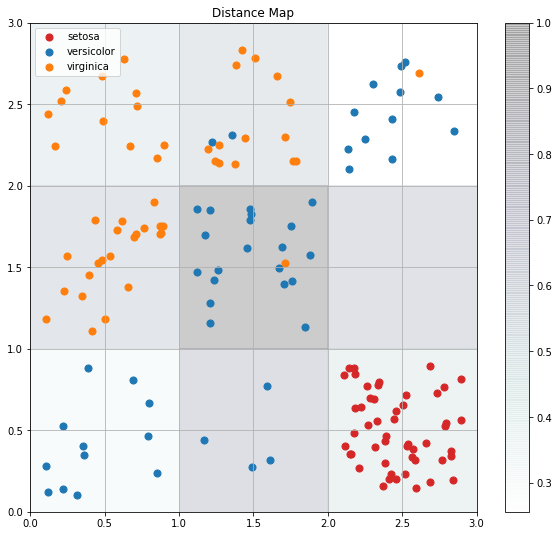

In [53]:

w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

label_names = np.array(df.label.unique())

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend()#loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.title("Distance Map")
plt.show()

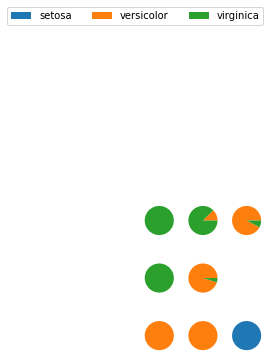

In [15]:
n_neurons = 3
m_neurons = 4

import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(3, 3))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names, bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.grid()
#plt.savefig('resulting_images/som_seed_pies.png')
plt.show()

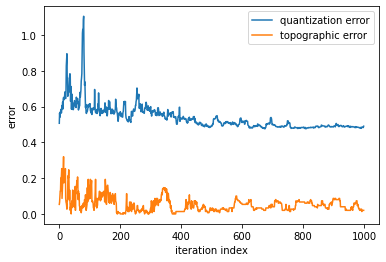

In [16]:
# som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,neighborhood_function='gaussian', random_seed=10)


max_iter = 1000
q_error = []
t_error = []
for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

#Erro de quantização baixa

# Experiment 1

Exasens Data Set

The Exasens dataset includes demographic information on 4 groups of saliva samples (COPD-Asthma-Infected-HC) collected in the frame of a joint research project, Exasens ([Web Link]), at the Research Center Borstel, BioMaterialBank Nord (Borstel, Germany). The sampling procedure of the patient materials was approved by the local ethics committee of the University of Luebeck under the approval number AZ-16-167 and a written informed consent was obtained from all subjects. A permittivity biosensor, developed at IHP Microelectronics (Frankfurt Oder, Germany), was used for the dielectric characterization of the saliva samples for classification purposes ([Web Link]). 

https://archive.ics.uci.edu/ml/datasets/Exasens#

## Pre-Processing

In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00523/Exasens.csv

--2022-07-22 19:10:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00523/Exasens.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14051 (14K) [application/x-httpd-php]
Saving to: ‘Exasens.csv’

Exasens.csv         100%[===================>]  13.72K  --.-KB/s    in 0.08s   

2022-07-22 19:10:36 (172 KB/s) - ‘Exasens.csv’ saved [14051/14051]



In [141]:
df = pd.read_csv('Exasens.csv')

In [142]:
df.isnull().sum()
df = df.drop(columns=['ID', 'Imaginary Part', 'Unnamed: 3','Real Part','Unnamed: 5','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'], inplace=False)

In [143]:
df.isnull().sum()

Diagnosis    2
Gender       2
Age          2
Smoking      2
dtype: int64

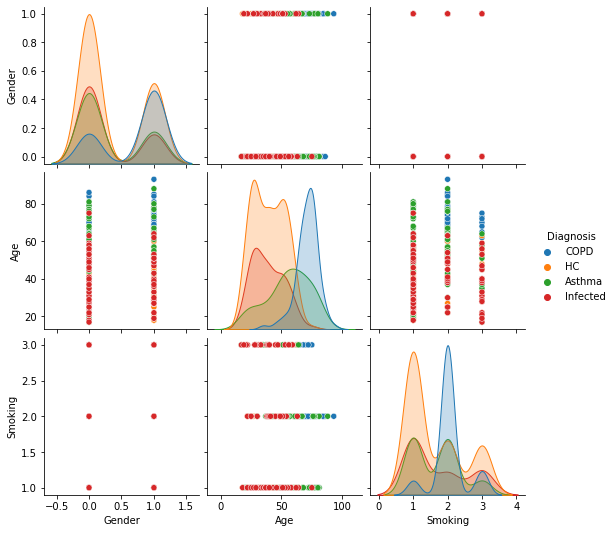

In [144]:
df = df.dropna(axis=0)
sns.pairplot(df, hue='Diagnosis')

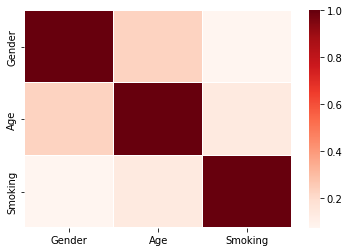

In [145]:
features = df.drop(['Diagnosis'], axis=1)
#Normaling data
scaler = MinMaxScaler() 
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
sns.heatmap(features.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Reds")

## Parameters

In [147]:
#Parameters
data = features
labels = df.Diagnosis.unique()

#Tranforming the data for numerical values
df['Diagnosis'].replace(['COPD', 'HC', 'Asthma', 'Infected'],
                        [0,1,2,3], inplace=True)
target = df['Diagnosis'].values

### Som 3x3  σ = 0.3

Paramentets 🎛️

In [148]:
# Models Paramentes 🎛️
n_neurons, m_neurons = 3, 3
sigma = 3.
learning_rate = 7.
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 1000

In [149]:
som_Exasens33 = MiniSom(n_neurons, m_neurons, data.shape[1], 
                        sigma=sigma, 
                        learning_rate=learning_rate,
                        neighborhood_function=neighborhood_function, 
                        random_seed=random_seed)
som_Exasens33.random_weights_init(data.values)
som_Exasens33.train_random(data.values, epochs)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2561: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


#### Maps

<Figure size 432x288 with 0 Axes>

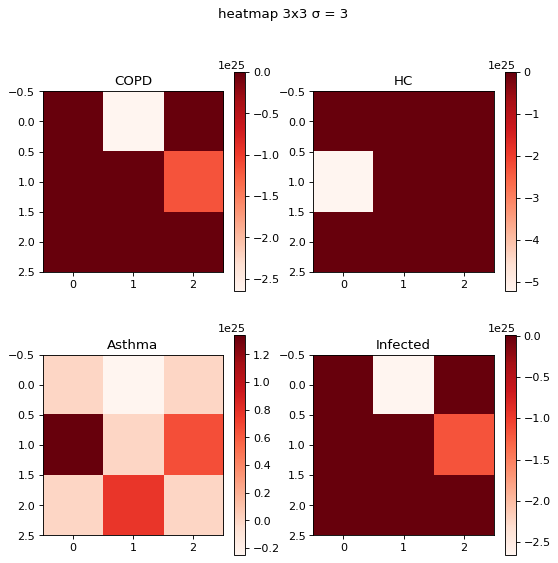

In [151]:
som = som_Exasens33

grid_shape = som.get_weights().shape[0:2]
weights = som.get_weights()
plt.figure()
#heatmap(som_iris33, iris.feature_names, (2, 2), cmap='Reds')
figure(figsize=(8, 8),dpi=80)
for i in range(len(labels)):
  plt.subplot(2,2, i + 1)
  plt.title(labels[i])
  plt.imshow(weights[:, :, i-1], cmap='Reds')
  plt.suptitle('heatmap 3x3 σ = 3')
  plt.colorbar() #for plot the bar
plt.show()

Text(0.5, 1.0, 'U-Matrix')

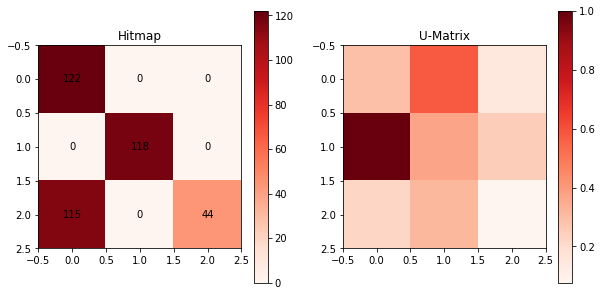

In [152]:
figure(figsize=(10,5))
plt.subplot(1,2,1)
frequencies = som.activation_response(data.values).astype(int)
#transpose
frequencies = frequencies.T[::-1]
plt.imshow(frequencies,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(frequencies):
        plt.text(j, i, value, verticalalignment='center', 
                              horizontalalignment='center')
plt.title('Hitmap')        
plt.subplot(1,2,2)
plt.imshow(som.distance_map(),cmap="Reds")
plt.colorbar()
plt.title('U-Matrix')

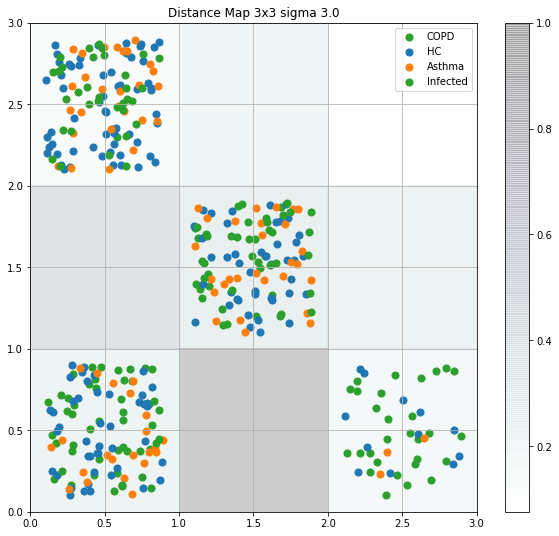

In [153]:
w_x, w_y = zip(*[som.winner(d) for d in data.values])
w_x = np.array(w_x)
w_y = np.array(w_y)
label_names = np.array(labels)
plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], 
                label=label_names[c])
plt.legend()#loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.title("Distance Map "+str(n_neurons)+'x'+str(n_neurons)+" sigma "+str(sigma))
plt.show()

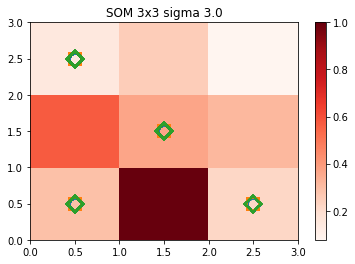

In [154]:
#markers = ['o', 's', 'D']
#colors  = ['C0', 'C1', 'C2']

plt.pcolor(som.distance_map().T, cmap='Reds')  # plotting the distance map as background
plt.colorbar()
for cnt, xx in enumerate(features.values):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
plt.title('SOM '+str(n_neurons)+'x'+str(n_neurons)+" sigma "+str(sigma))
#plt.legend()
plt.show()

No handles with labels found to put in legend.


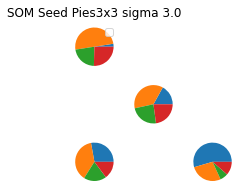

In [163]:

import matplotlib.gridspec as gridspec
#labels_map = som.labels_map(data.values, [label_names[t] for t in target])

fig = plt.figure(figsize=(3, 3))
#the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend()#patches, label_names, bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.grid()
#plt.savefig('resulting_images/som_seed_pies.png')
plt.title('SOM Seed Pies'+str(n_neurons)+'x'+str(n_neurons)+" sigma "+str(sigma))
plt.show()

### Som 6x6 σ = 0.3

Paramentets 🎛️

In [93]:
# Models Paramentes 🎛️
n_neurons, m_neurons = 6, 6
sigma = 3.
learning_rate = 7.
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 1000

In [94]:

som_Exasens66 = MiniSom(n_neurons, n_neurons, data.shape[1], 
                        sigma=sigma, 
                        learning_rate=learning_rate,
                        neighborhood_function=neighborhood_function, 
                        random_seed=random_seed)
som_Exasens66.random_weights_init(data.values)
som_Exasens66.train_random(data.values, epochs)

#### Maps

<Figure size 432x288 with 0 Axes>

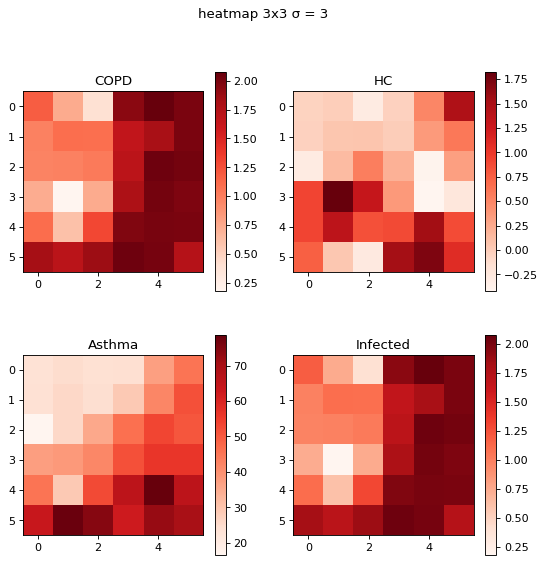

In [95]:
som = som_Exasens66

grid_shape = som.get_weights().shape[0:2]
weights = som.get_weights()
plt.figure()
#heatmap(som_iris33, iris.feature_names, (2, 2), cmap='Reds')
figure(figsize=(8, 8),dpi=80)
for i in range(len(labels)):
  plt.subplot(2,2, i + 1)
  plt.title(labels[i])
  plt.imshow(weights[:, :, i-1], cmap='Reds')
  plt.suptitle('heatmap 3x3 σ = 3')
  plt.colorbar() #for plot the bar
plt.show()

Text(0.5, 1.0, 'U-Matrix')

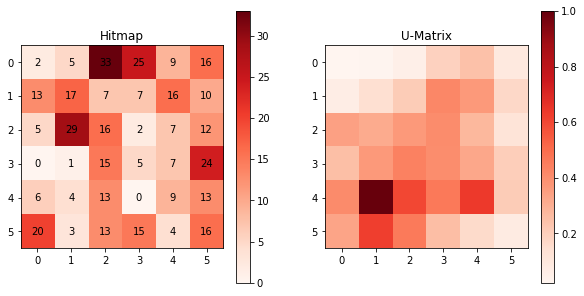

In [96]:
figure(figsize=(10,5))
plt.subplot(1,2,1)
frequencies = som.activation_response(data.values).astype(int)
#transpose
frequencies = frequencies.T[::-1]
plt.imshow(frequencies,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(frequencies):
        plt.text(j, i, value, verticalalignment='center', 
                              horizontalalignment='center')
plt.title('Hitmap')        
plt.subplot(1,2,2)
plt.imshow(som.distance_map(),cmap="Reds")
plt.colorbar()
plt.title('U-Matrix')

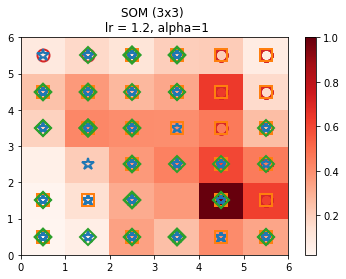

In [97]:
#markers = ['o', 's', 'D']
#colors  = ['C0', 'C1', 'C2']

plt.pcolor(som.distance_map().T, cmap='Reds')  # plotting the distance map as background
plt.colorbar()
for cnt, xx in enumerate(features.values):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
plt.title('SOM (3x3) \n lr = 1.2, alpha=1')
#plt.legend()
plt.show()

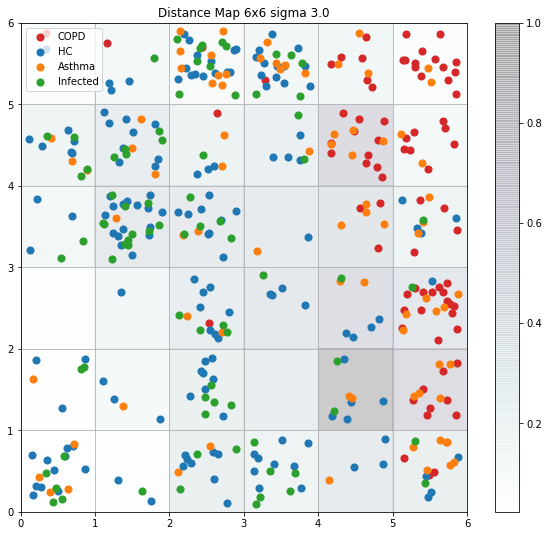

In [99]:
w_x, w_y = zip(*[som.winner(d) for d in data.values])
w_x = np.array(w_x)
w_y = np.array(w_y)
label_names = np.array(labels)
plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], 
                label=label_names[c])
plt.legend()#loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.title("Distance Map "+str(n_neurons)+'x'+str(n_neurons)+" sigma "+str(sigma))
plt.show()

### Som 9x9 σ = 0.3

Paramentets 🎛️

In [100]:
# Models Paramentes 🎛️
n_neurons, m_neurons = 9, 9
sigma = 3.
learning_rate = 7.
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 1000

In [101]:

som_Exasens66 = MiniSom(n_neurons, n_neurons, data.shape[1], 
                        sigma=sigma, 
                        learning_rate=learning_rate,
                        neighborhood_function=neighborhood_function, 
                        random_seed=random_seed)
som_Exasens66.random_weights_init(data.values)
som_Exasens66.train_random(data.values, epochs)

#### Maps

<Figure size 432x288 with 0 Axes>

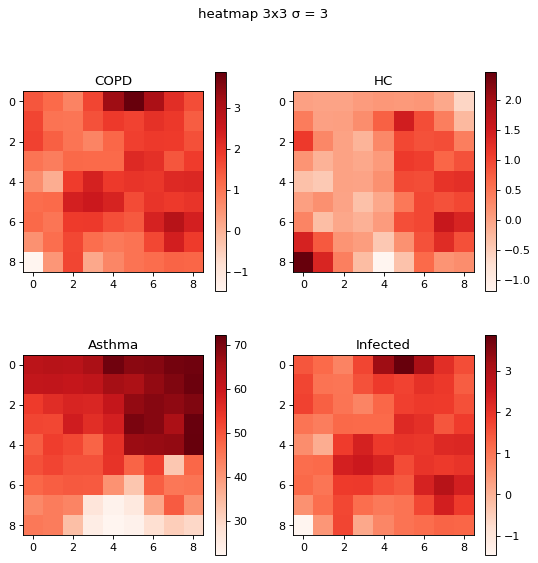

In [102]:
som = som_Exasens66

grid_shape = som.get_weights().shape[0:2]
weights = som.get_weights()
plt.figure()
#heatmap(som_iris33, iris.feature_names, (2, 2), cmap='Reds')
figure(figsize=(8, 8),dpi=80)
for i in range(len(labels)):
  plt.subplot(2,2, i + 1)
  plt.title(labels[i])
  plt.imshow(weights[:, :, i-1], cmap='Reds')
  plt.suptitle('heatmap 3x3 σ = 3')
  plt.colorbar() #for plot the bar
plt.show()

Text(0.5, 1.0, 'U-Matrix')

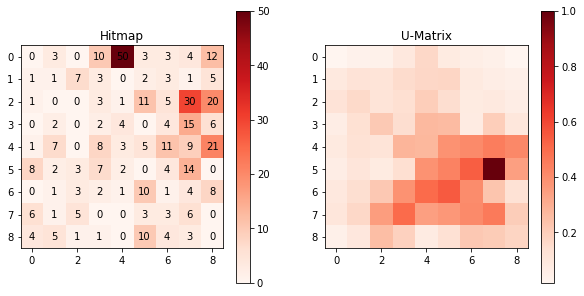

In [103]:
figure(figsize=(10,5))
plt.subplot(1,2,1)
frequencies = som.activation_response(data.values).astype(int)
#transpose
frequencies = frequencies.T[::-1]
plt.imshow(frequencies,cmap='Reds')
plt.colorbar()
for (i, j), value in np.ndenumerate(frequencies):
        plt.text(j, i, value, verticalalignment='center', 
                              horizontalalignment='center')
plt.title('Hitmap')        
plt.subplot(1,2,2)
plt.imshow(som.distance_map(),cmap="Reds")
plt.colorbar()
plt.title('U-Matrix')

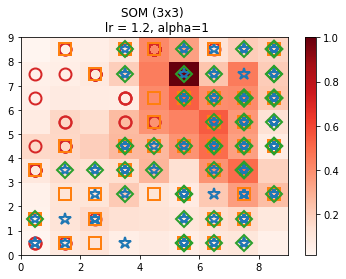

In [104]:
#markers = ['o', 's', 'D']
#colors  = ['C0', 'C1', 'C2']

plt.pcolor(som.distance_map().T, cmap='Reds')  # plotting the distance map as background
plt.colorbar()
for cnt, xx in enumerate(features.values):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
plt.title('SOM (3x3) \n lr = 1.2, alpha=1')
#plt.legend()
plt.show()

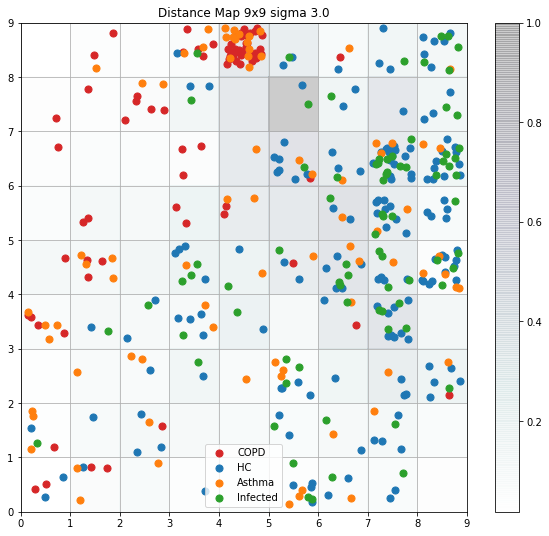

In [105]:
w_x, w_y = zip(*[som.winner(d) for d in data.values])
w_x = np.array(w_x)
w_y = np.array(w_y)
label_names = np.array(labels)
plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], 
                label=label_names[c])
plt.legend()#loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.title("Distance Map "+str(n_neurons)+'x'+str(n_neurons)+" sigma "+str(sigma))
plt.show()

# Experiment 2 

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# Runing this exemple 
https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

Exemple can be founf [here](https://www.kaggle.com/code/jonathankristanto/customer-clustering-with-self-organizing-map-som)

In [106]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


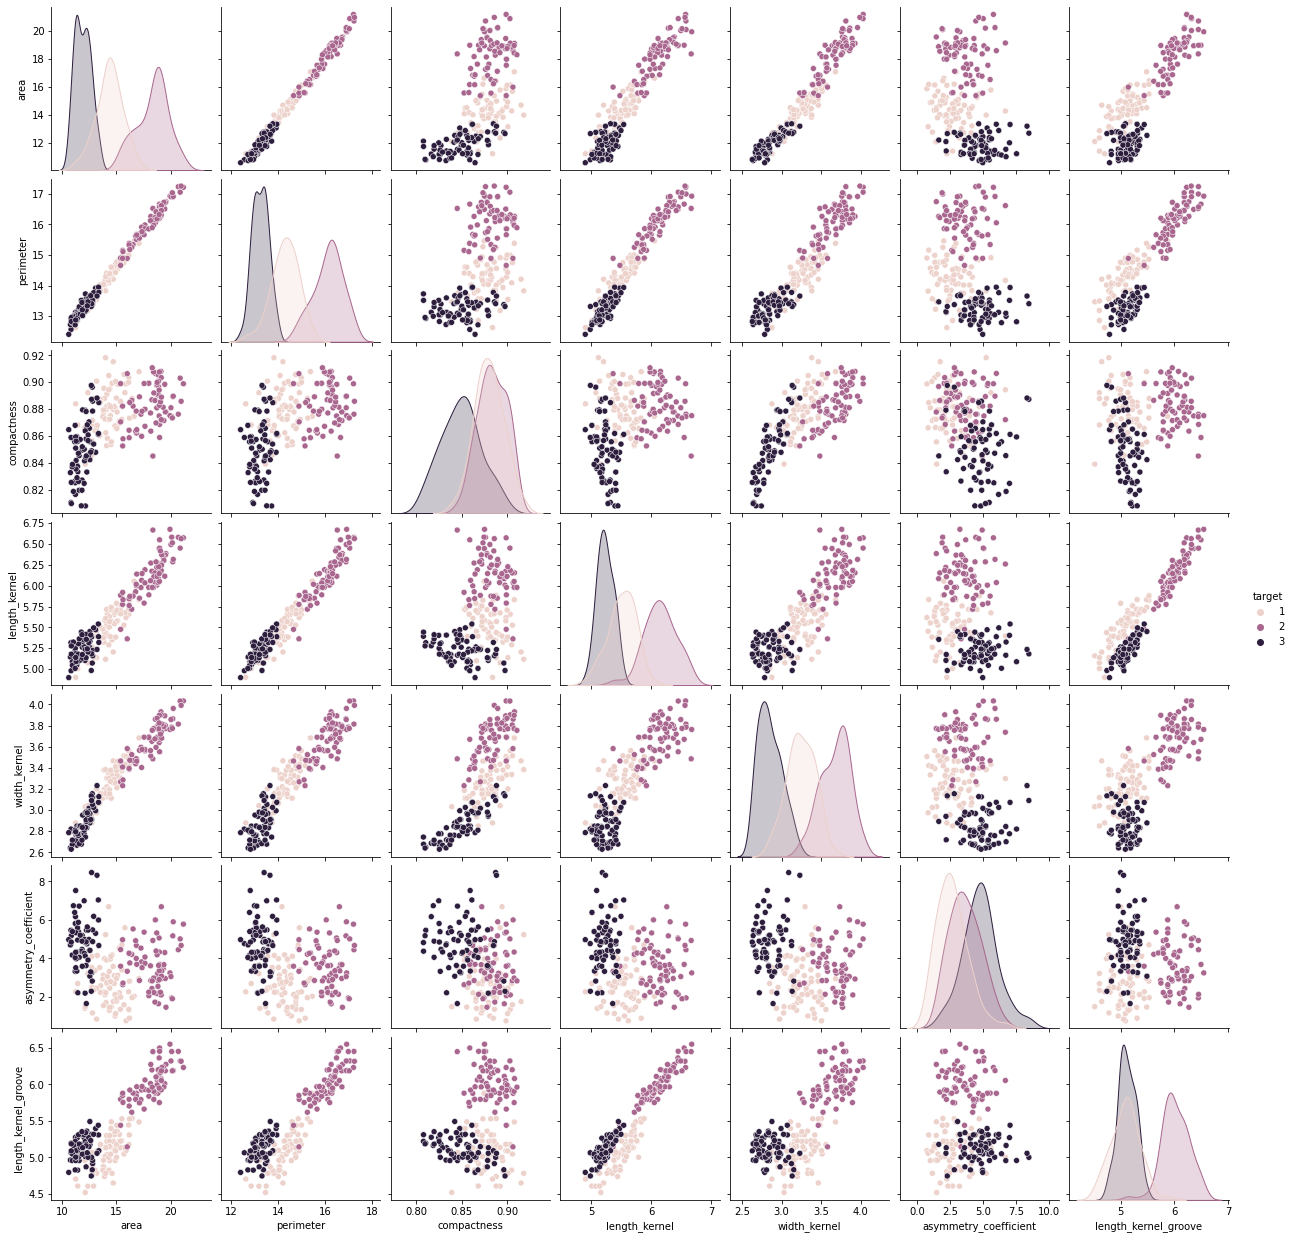

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')
sns.pairplot(data, hue = 'target')


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length_kernel          210 non-null    float64
 4   width_kernel           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   length_kernel_groove   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [109]:
target = data['target'].values
label_names = {1:'Kama', 2:'Rosa', 3:'Canadian'}
data = data[data.columns[:-1]]
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0) #normalization without using Sklearn
data = data.values

In [110]:
# Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5027330766864881


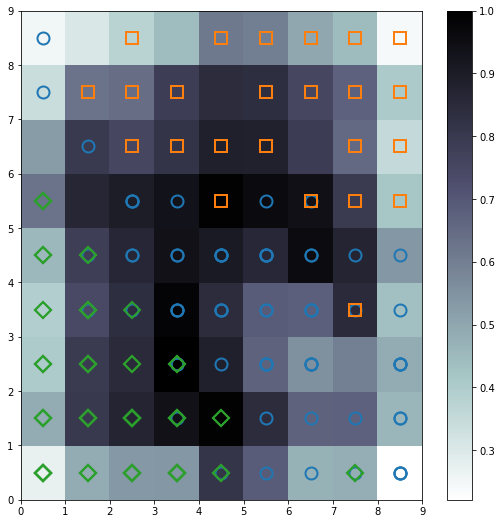

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
plt.show()

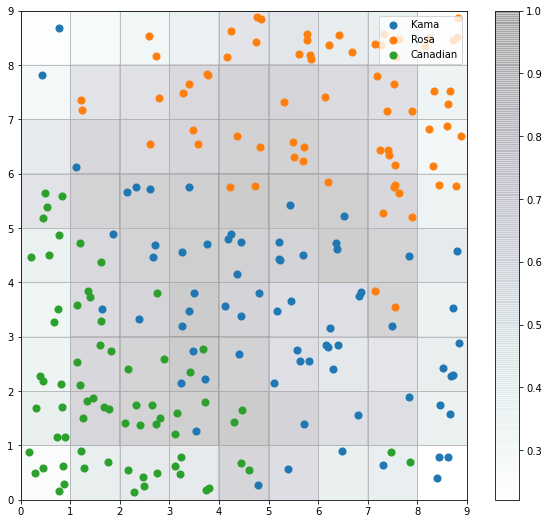

In [112]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
#plt.savefig('resulting_images/som_seed.png')
plt.show()

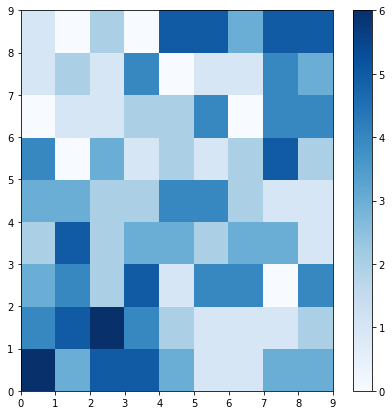

In [113]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

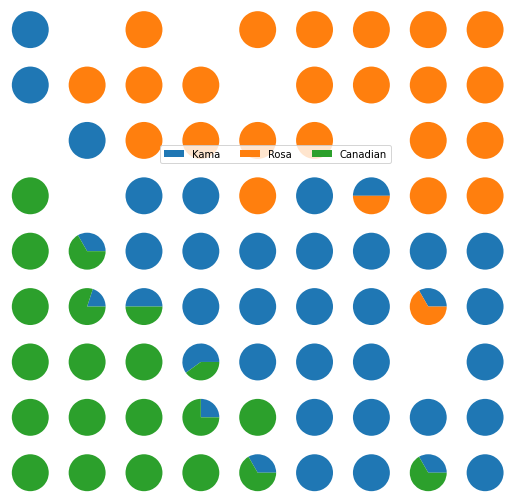

In [114]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.grid()
#plt.savefig('resulting_images/som_seed_pies.png')
plt.show()

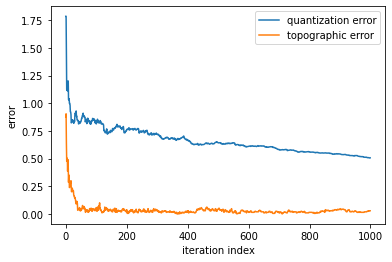

In [115]:

som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

#Erro de quantização baixa

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

http://alexlenail.me/NN-SVG/index.html

https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d

https://medium.com/analytics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/